In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris().data

In [ ]:
data.shape

(150, 4)

In [ ]:
labels = load_iris().target

In [ ]:
labels.shape

(150,)

In [ ]:
import numpy as np

In [ ]:
labels = np.reshape(labels,(150,1))

In [ ]:
data = np.concatenate([data,labels],axis=-1)

In [ ]:
data.shape

(150, 5)

In [ ]:
import pandas as pd

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

In [ ]:
dataset = pd.DataFrame(data,columns=names)

In [ ]:
dataset['species'].replace(0, 'iris-setosa', inplace= True)
dataset['species'].replace(1, 'iris-versicolor', inplace=True)
dataset['species'].replace(2, 'iris-verginica', inplace=True)

In [ ]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [ ]:
import matplotlib.pyplot as plt


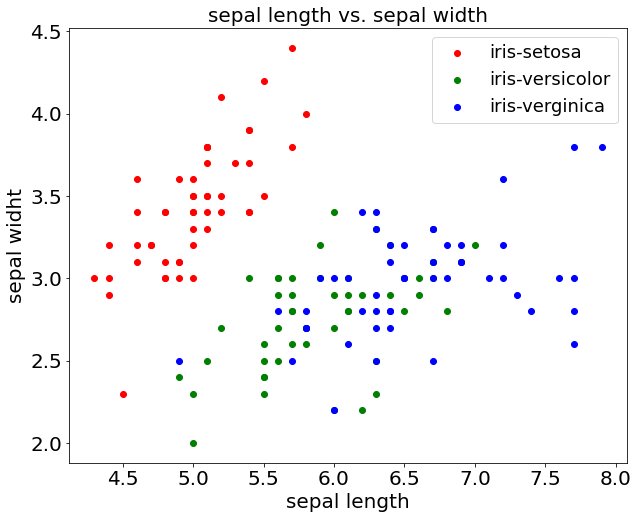

In [ ]:
plt.figure(4, figsize=(10, 8))

plt.scatter(data[:50, 0], data[:50, 1], c='r', label = 'iris-setosa')

plt.scatter(data[50:100, 0], data[50:100, 1], c='g', label='iris-versicolor')

plt.scatter(data[100:, 0], data[100:, 1], c='b', label='iris-verginica')

plt.xlabel('sepal length',fontsize = 20)
plt.ylabel('sepal widht',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('sepal length vs. sepal width',fontsize = 20)
plt.legend(prop={'size': 18})
plt.show()

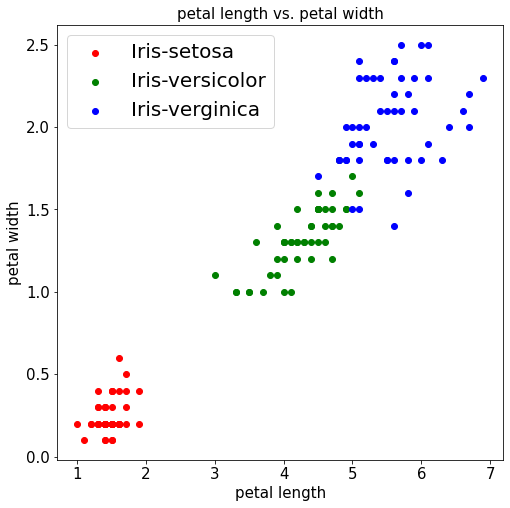

In [ ]:
plt.figure(4, figsize=(8, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g', label= 'Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b', label= 'Iris-verginica')

plt.xlabel('petal length', fontsize=15)
plt.ylabel('petal width', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('petal length vs. petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

In [ ]:
dataset.iloc[:,2:].corr()

,petal-length,petal-width
petal-length,1.000000,0.962865
petal-width,0.962865,1.000000


In [ ]:
dataset.iloc[:50,:].corr()  #setosa

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [ ]:
dataset.iloc[50:100,:].corr()  #versicolor

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


In [ ]:
dataset.iloc[100:,:].corr()  #virginica

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.457228,0.864225,0.281108
sepal-width,0.457228,1.000000,0.401045,0.537728
petal-length,0.864225,0.401045,1.000000,0.322108
petal-width,0.281108,0.537728,0.322108,1.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


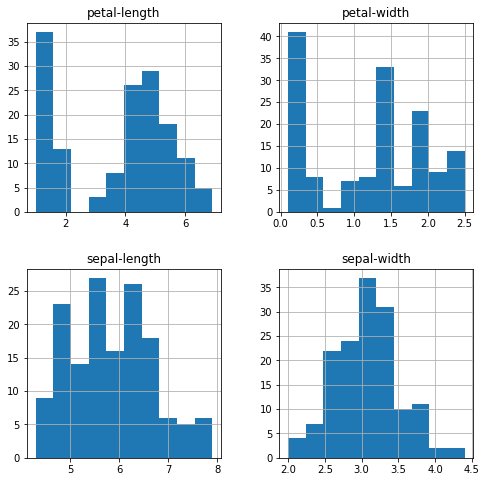

In [ ]:
fig = plt.figure(figsize = (8,8))

ax = fig.gca()

dataset.hist(ax = ax)

plt.show()

In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(dataset.groupby('species').size())

species
iris-setosa        50
iris-verginica     50
iris-versicolor    50
dtype: int64


In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(dataset.iloc[:, :3], dataset.iloc[:,4], test_size = 0.2, random_state = 42)

In [ ]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((120, 3), (120,), (30, 3), (30,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors = np.arange(1,9)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

In [ ]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, train_label)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)

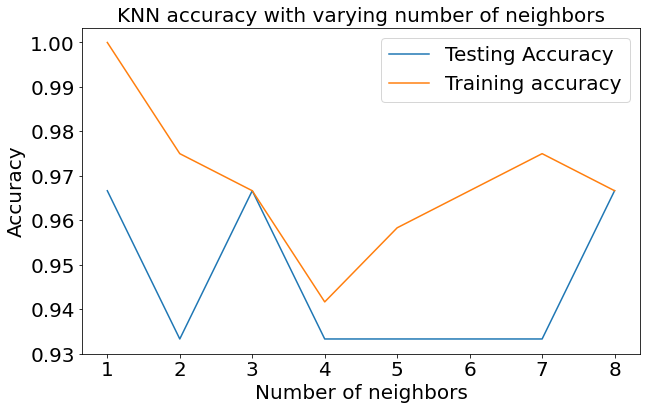

In [ ]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

In [ ]:
test_accuracy

0.9666666666666667

In [ ]:
prediction = knn.predict(test_data)

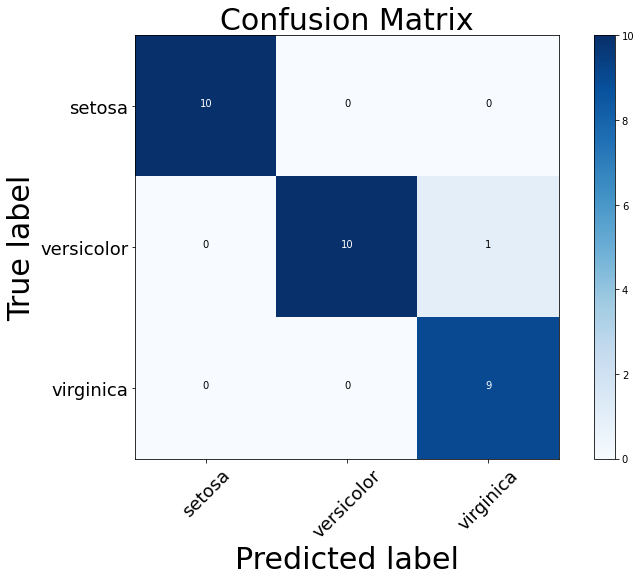

In [ ]:
import itertools
import sklearn

def plot_confusion_matrix(cm, classes, normalize = False,
                          title = 'confusion matrix',
                          cmap = plt.cm.Blues):

   plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation = 45)
   plt.yticks(tick_marks, classes)


   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i,j], fmt),
              horizontalalignment = "center",
              color = "white" if cm[i, j] > thresh else "black")

     plt.ylabel('True label',fontsize=30)
     plt.xlabel('Predicted label',fontsize=30)
     plt.tight_layout()
     plt.xticks(fontsize=18)
     plt.yticks(fontsize=18)
class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()                      

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
 iris-verginica       1.00      0.91      0.95        11
iris-versicolor       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

